In [73]:
# 필요한 라이브러리들 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [75]:
# csv를 읽어와서 Pandas DataFrame으로 저장
data1 = pd.read_csv('data/2000_2001_hitter.csv')
data2 = pd.read_csv('data/2002_2013_hitter.csv')
data3 = pd.read_csv('data/2014_hitter.csv')



In [76]:
#파일을 합치기
df_combined = pd.concat([data1, data2, data3], ignore_index=True)
df_combined.head(5)

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.976667,100.354529,8.286154,0.400138,92.804,NaN,NaN,NaN,NaN,NaN
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,1.063830,115.473840,9.306847,0.431993,105.000,NaN,NaN,NaN,NaN,NaN
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.931655,86.204956,8.224501,0.400969,77.820,NaN,NaN,NaN,NaN,NaN
3,2000송지만,2000,4,송지만,한화,0.338,120,530,468,158,...,1.110092,119.916981,9.811389,0.436688,107.594,NaN,NaN,NaN,NaN,NaN
4,2000데이비스,2000,5,데이비스,한화,0.334,107,458,419,140,...,0.923588,82.605677,7.125729,0.394586,80.284,NaN,NaN,NaN,NaN,NaN


In [77]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YrPlayer  649 non-null    object 
 1   Year      649 non-null    int64  
 2   Rank      649 non-null    int64  
 3   Player    649 non-null    object 
 4   Team      649 non-null    object 
 5   AVG       649 non-null    float64
 6   G         649 non-null    int64  
 7   PA        649 non-null    int64  
 8   AB        649 non-null    int64  
 9   H         649 non-null    int64  
 10  1B        649 non-null    int64  
 11  2B        649 non-null    int64  
 12  3B        649 non-null    int64  
 13  HR        649 non-null    int64  
 14  RBI       649 non-null    int64  
 15  SB        648 non-null    float64
 16  CS        648 non-null    float64
 17  BB        649 non-null    int64  
 18  HBP       649 non-null    int64  
 19  SO        649 non-null    int64  
 20  GDP       649 non-null    int64 

In [78]:
df_combined.describe()

,Year,Rank,AVG,G,PA,AB,H,1B,2B,3B,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,560.000000,560.00000,560.000000,560.000000,560.000000
mean,2007.118644,22.374422,0.288872,121.311248,489.496148,422.855162,122.511556,85.661017,21.375963,1.893683,...,0.799547,72.640605,6.063903,0.354215,69.775458,63.223214,6.05000,32.696429,0.293187,0.197748
std,4.419001,12.939079,0.028583,8.342507,53.884253,46.813004,20.563818,16.647370,6.229939,2.033540,...,0.159885,22.210886,1.845858,0.041078,18.978558,17.116307,6.36524,8.140580,0.047519,0.279419
min,2000.000000,1.000000,0.203000,93.000000,390.000000,327.000000,71.000000,36.000000,5.000000,0.000000,...,0.478571,29.373224,2.367394,0.258774,28.178000,26.000000,0.00000,14.000000,0.149000,0.000000
25%,2003.000000,11.000000,0.269000,117.000000,445.000000,385.000000,108.000000,74.000000,16.000000,0.000000,...,0.680412,56.768750,4.796734,0.325362,56.322000,51.000000,1.00000,27.000000,0.260000,0.000000
50%,2007.000000,22.000000,0.288000,123.000000,487.000000,421.000000,121.000000,84.000000,21.000000,1.000000,...,0.783394,68.763416,5.766099,0.352448,67.270000,62.000000,4.00000,32.000000,0.292500,0.000000
75%,2011.000000,33.000000,0.308000,127.000000,533.000000,459.000000,137.000000,95.000000,25.000000,3.000000,...,0.889251,84.681818,6.988870,0.379460,81.298000,74.000000,9.00000,38.000000,0.324000,0.333000
max,2014.000000,55.000000,0.372000,133.000000,617.000000,543.000000,201.000000,136.000000,43.000000,17.000000,...,1.531746,166.135175,14.726092,0.498024,144.746000,135.000000,36.00000,66.000000,0.438000,1.000000


In [79]:
df_combined.sample()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
25,2000유지현,2000,26,유지현,LG,0.281,129,592,495,139,...,0.750678,77.982568,5.384985,0.334993,77.21,NaN,NaN,NaN,NaN,NaN


In [80]:
df_combined.tail()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
644,2014이범호,2014,51,이범호,KIA,0.269,105,406,350,94,...,0.884328,64.894286,6.441712,0.369291,63.468,47.0,0.0,24.0,0.293,0.000
645,2014모창민,2014,52,모창민,NC,0.263,122,468,419,110,...,0.676647,53.028291,4.138046,0.319970,55.644,62.0,8.0,22.0,0.263,0.667
646,2014오지환,2014,53,오지환,LG,0.262,113,464,397,104,...,0.818182,64.147759,5.463689,0.336344,63.404,72.0,6.0,21.0,0.359,0.000
647,2014조동화,2014,54,조동화,SK,0.262,125,522,443,116,...,0.539359,48.898621,3.520701,0.293759,48.544,74.0,28.0,26.0,0.328,0.143
648,2014김재호,2014,55,김재호,두산,0.252,122,421,341,86,...,0.620818,41.969406,3.867488,0.304498,44.468,50.0,13.0,21.0,0.298,0.000


In [81]:
# 변수 선택
X = df_combined[['HR','OPS','ISO','SECA','TA','RC','RC/27','wOBA','XR']]
y = df_combined['YrPlayer']

print(X.shape, y.shape)
X.head()
y.head()

(649, 9) (649,)


0     2000박종호 
1     2000김동주 
2     2000브리또 
3     2000송지만 
4    2000데이비스 
Name: YrPlayer, dtype: object

In [82]:
X.head()

,HR,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,10,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,31,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,15,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820
3,32,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594
4,22,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284


<Axes: >

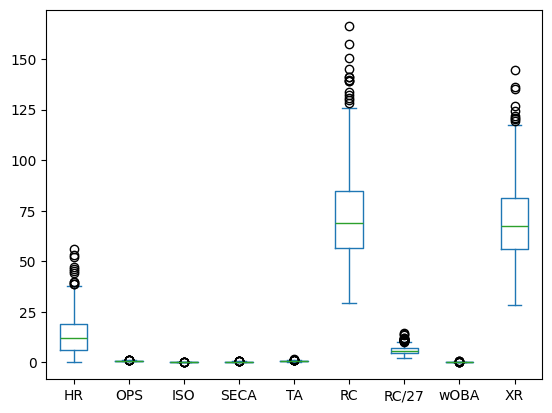

In [83]:
# 데이터 분포 확인(박스플롯)
X.plot(kind='box')


In [84]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,HR,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,-0.373128,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334
1,1.815064,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449
2,0.147870,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202
3,1.919264,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235
4,0.877268,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133
...,...,...,...,...,...,...,...,...,...
644,0.564669,0.412201,1.132233,1.026659,0.530672,-0.349031,0.204838,0.367294,-0.332603
645,0.252070,-0.737598,-0.063556,-0.128516,-0.769272,-0.883686,-1.044144,-0.834318,-0.745176
646,-0.581527,-0.422330,-0.051699,0.773504,0.116640,-0.382668,-0.325418,-0.435385,-0.335978
647,-1.206725,-1.460858,-1.396013,-1.627267,-1.628601,-1.069759,-1.378851,-1.472888,-1.119570


<Axes: >

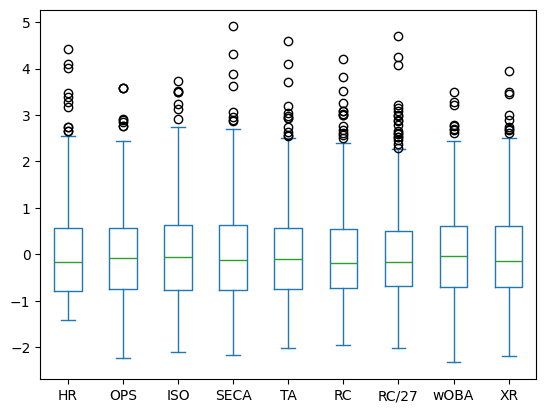

In [85]:
X_scaled_df.plot(kind='box')

In [86]:
# 최적의 k 찾기


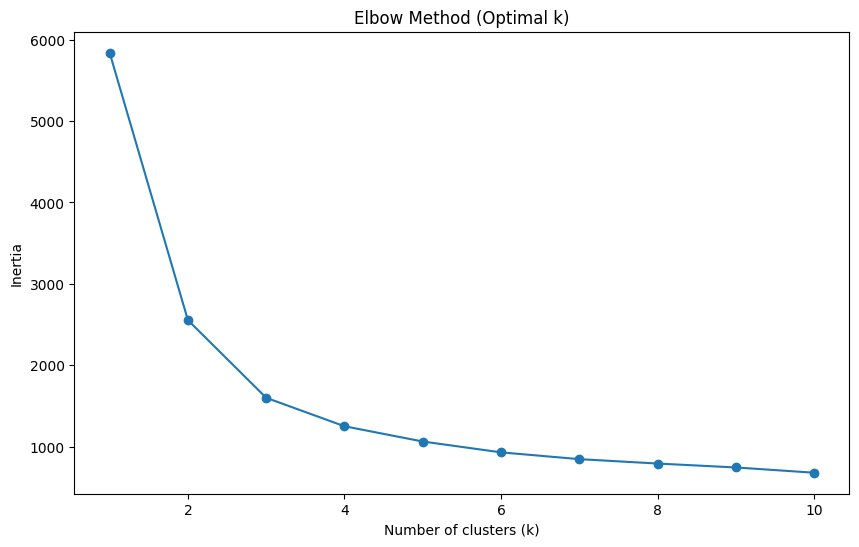

In [87]:
# 엘보우 기법으로 최적의 k 찾기
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA


inertia = []
range_k = range(1, 11)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o')
plt.title('Elbow Method (Optimal k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [88]:
# 시각화 함수
def visualize_silhouette(cluster_lists, X_features): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=42)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

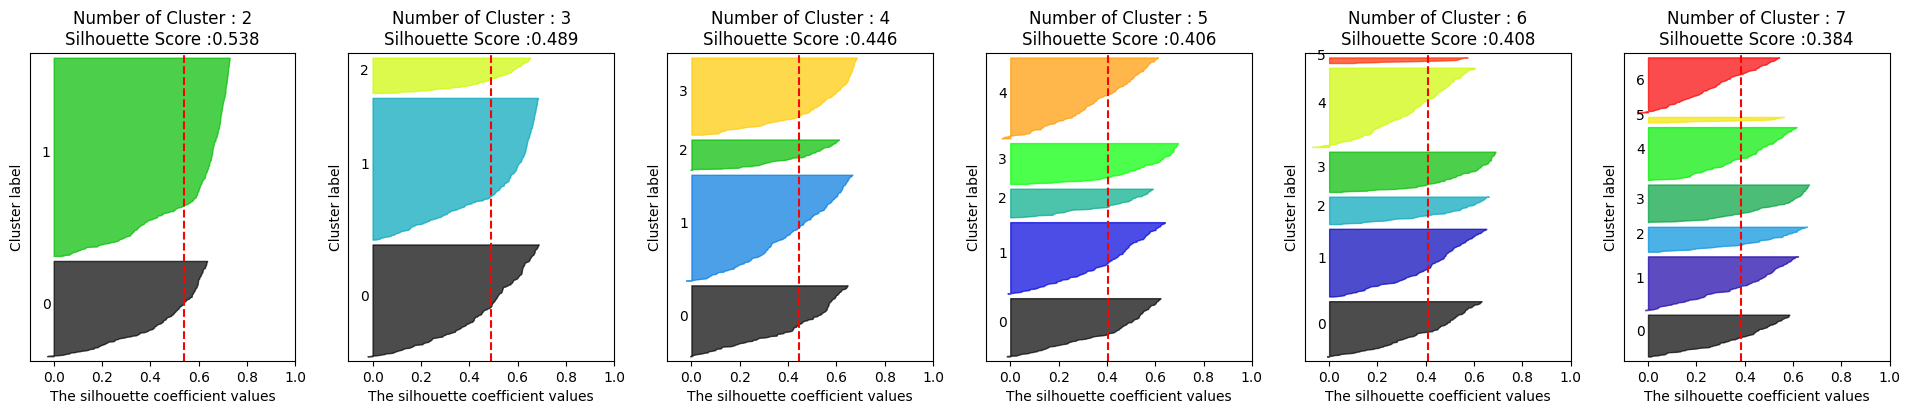

In [89]:
# 실루엣 점수 확인
from sklearn.metrics import silhouette_samples, silhouette_score

visualize_silhouette([2, 3, 4, 5, 6, 7], X)

plt.show()


In [90]:
k = 4 # or 3

km = KMeans(n_clusters=k, random_state=42)
cluster = km.fit_predict(X)
cluster


array([0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1,
       3, 3, 2, 0, 1, 1, 3, 0, 1, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2,
       0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 3,
       1, 1, 3, 3, 3, 1, 0, 1, 0, 0, 1, 0, 2, 1, 3, 3, 3, 0, 3, 3, 3, 1,
       3, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 3,
       1, 3, 0, 1, 2, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 3, 1, 2, 0, 1, 1, 1,
       1, 3, 3, 0, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 2, 0, 0, 2, 0, 1, 0,
       2, 1, 0, 0, 0, 1, 0, 1, 3, 2, 1, 1, 0, 0, 1, 0, 1, 3, 1, 0, 1, 1,
       0, 1, 1, 3, 3, 1, 1, 1, 0, 1, 3, 3, 3, 0, 3, 1, 3, 1, 3, 0, 0, 0,
       0, 1, 3, 0, 1, 3, 0, 1, 1, 3, 2, 0, 3, 3, 3, 1, 1, 1, 3, 3, 0, 1,
       3, 0, 3, 1, 0, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 3,
       1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 2, 2,

In [91]:
# 군집화 결과 분석 

# 데이터프레임 생성
df = pd.DataFrame(X, columns=X.columns)
df['cluster'] = cluster
df.head()


,HR,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster
0,10,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804,0
1,31,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000,2
2,15,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820,0
3,32,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594,2
4,22,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284,0


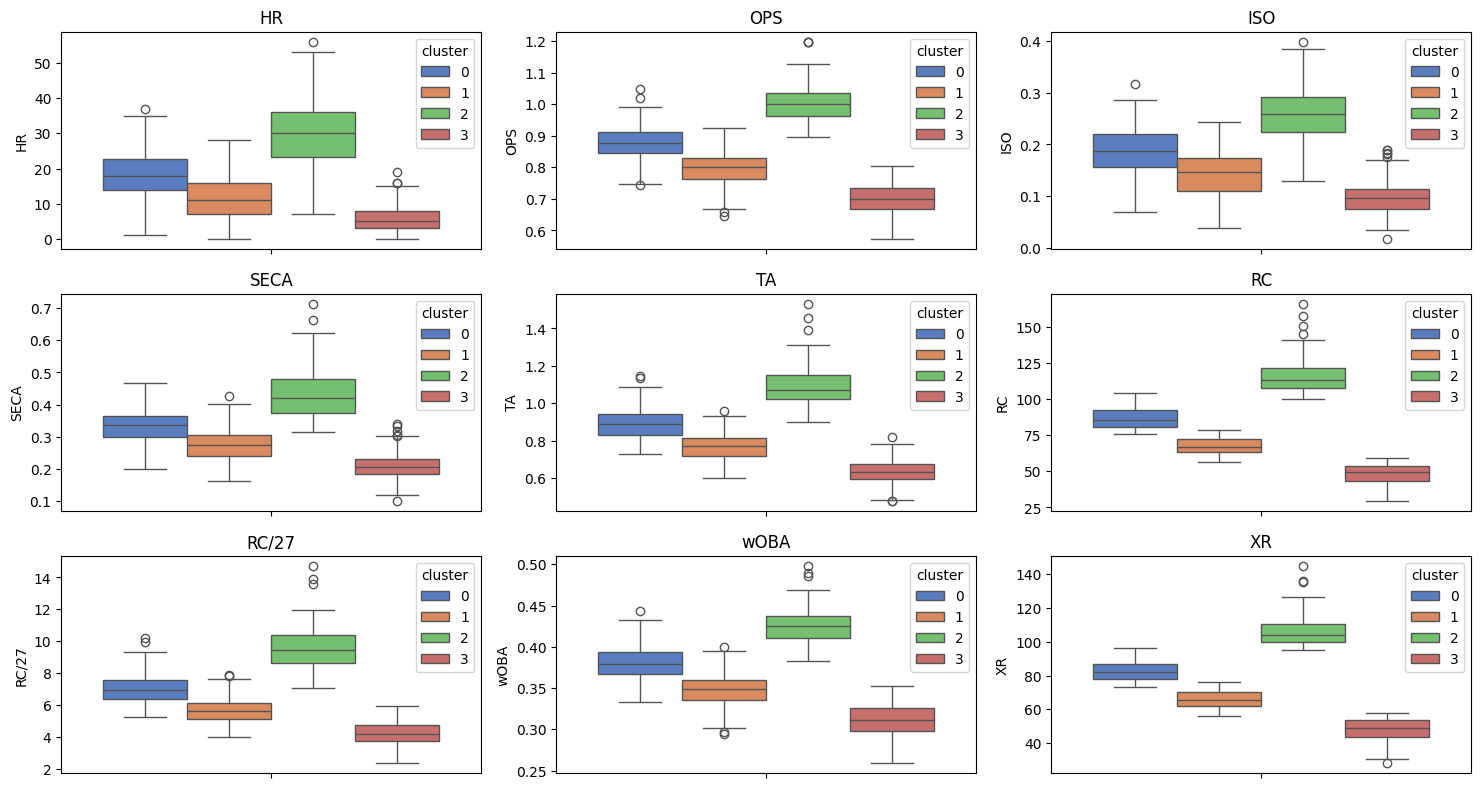

In [92]:
# 군집의 데이터 특징 분석
cols = df.columns[:-1]

plt.figure(figsize=(15,8))
for i, col in enumerate(cols):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df, y=col, hue='cluster', palette='muted')
    plt.title(col)
plt.tight_layout()

In [93]:
# 초록색(2번 cluster) = 가장 폼이 좋은 선수들
# 파란색(0번 cluster) = 주전급 선수들
# 주황색(1번 cluster) = 부진한 주전 선수
# 빨간색(3번 cluster) = 낙오자

In [94]:
# 데이터프레임에 개별 데이터 실루엣 계수 컬럼 추가
from sklearn.metrics import silhouette_samples

df['silhouette'] = silhouette_samples(X, cluster)
df

,HR,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,silhouette
0,10,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804,0,0.352381
1,31,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000,2,0.589771
2,15,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820,0,0.501934
3,32,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594,2,0.610413
4,22,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284,0,0.522335
...,...,...,...,...,...,...,...,...,...,...,...
644,19,0.857000,0.228571,0.377143,0.884328,64.894286,6.441712,0.369291,63.468,1,0.549327
645,16,0.733000,0.150358,0.276850,0.676647,53.028291,4.138046,0.319970,55.644,3,0.219473
646,8,0.767000,0.151134,0.355164,0.818182,64.147759,5.463689,0.336344,63.404,1,0.556541
647,2,0.655000,0.063205,0.146727,0.539359,48.898621,3.520701,0.293759,48.544,3,0.649674


In [95]:
# 잘못 군집화 된 클러스터
df.loc[df['silhouette']<0]

,HR,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,silhouette
25,7,0.748580,0.094949,0.274747,0.750678,77.982568,5.384985,0.334993,77.210,0,-0.004999
48,4,0.855577,0.105000,0.297500,0.886207,79.773061,7.015872,0.379378,76.192,0,-0.004638
186,3,0.737000,0.075342,0.196347,0.663609,59.669457,4.809180,0.327185,57.370,1,-0.022396
507,25,0.973000,0.245413,0.444954,1.053125,102.628401,8.499898,0.412273,95.116,2,-0.004578
518,26,0.923000,0.238397,0.367089,0.968391,101.530127,7.678749,0.392733,96.166,2,-0.001167


In [96]:
# 클러스터 별 중심 player
df['player'] = y


In [97]:
df.loc[df.groupby('cluster')['silhouette'].idxmax()]


,HR,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,silhouette,player
442,20,0.929000,0.232500,0.375000,0.996564,90.140933,7.726366,0.398597,85.734,0,0.646368,2010최정
431,10,0.818000,0.132170,0.249377,0.795139,68.520711,6.126024,0.357084,65.952,1,0.666636,2010김강민
3,32,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594,2,0.610413,2000송지만
580,5,0.713000,0.108992,0.182561,0.622776,45.333333,4.294737,0.312861,44.760,3,0.684589,2013정의윤


In [98]:
# 전체 주성분 계산

from sklearn.decomposition import PCA

pca = PCA()
pca_comp = pca.fit_transform(X_scaled_df)
pca_comp


array([[ 2.24106058e+00, -1.72255348e+00,  1.24436494e-01, ...,
         9.83425952e-02, -4.99862285e-02, -1.25401546e-02],
       [ 5.18436246e+00, -7.05195037e-02,  5.14545539e-01, ...,
         3.65858252e-02, -5.31069969e-02,  1.59459228e-02],
       [ 1.99960665e+00, -6.88610817e-01, -2.51897728e-01, ...,
         1.78832696e-02, -4.55600825e-02, -3.40283068e-02],
       ...,
       [-5.51160538e-01,  1.81702972e-01, -7.14731305e-01, ...,
         6.27230196e-02, -1.61606063e-02,  3.19630707e-02],
       [-4.12341647e+00, -1.88073555e-01,  5.00643604e-01, ...,
        -1.14579769e-01,  7.86430629e-03,  2.35274946e-03],
       [-3.50945790e+00,  1.07404620e-01, -4.20783372e-01, ...,
        -3.93754087e-02,  1.84239415e-02, -1.55918535e-02]],
      shape=(649, 9))

In [99]:
pca.explained_variance_ratio_

array([8.84357731e-01, 6.73912324e-02, 2.46853594e-02, 1.76068099e-02,
       2.82275541e-03, 2.37250623e-03, 4.75833786e-04, 1.63476251e-04,
       1.24295991e-04])

In [100]:
# 컬럼별 설명된 분산 비율 확인
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.84357731e-01, 6.73912324e-02, 2.46853594e-02, 1.76068099e-02,
       2.82275541e-03, 2.37250623e-03, 4.75833786e-04, 1.63476251e-04,
       1.24295991e-04])

In [101]:
# 누적분산 확인
cumulative_variance = explained_variance.cumsum()
cumulative_variance

array([0.88435773, 0.95174896, 0.97643432, 0.99404113, 0.99686389,
       0.99923639, 0.99971223, 0.9998757 , 1.        ])

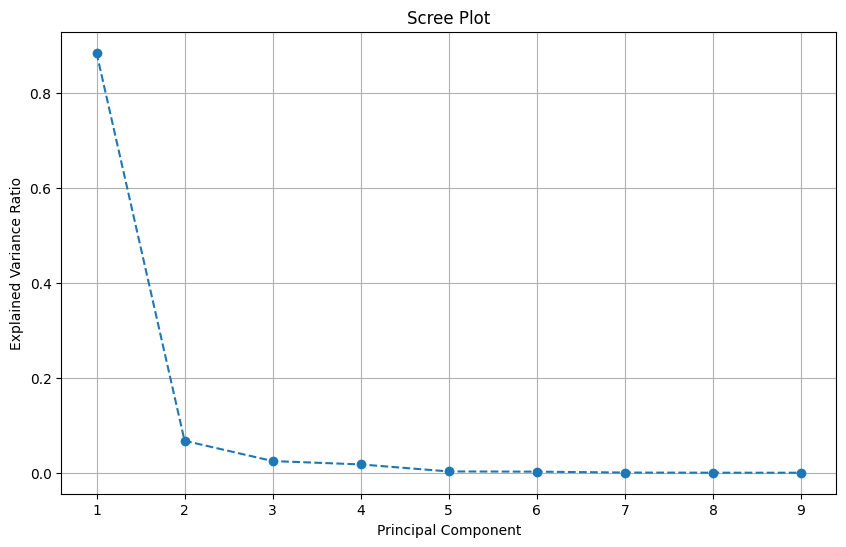

In [102]:
# Plot Scree Chart
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance) + 1, 1))
plt.grid()
plt.show()

In [103]:
# 최적의 주성분 개수 선택 (예: 95% 이상의 분산을 설명하는 최소 주성분 개수)


In [104]:
# 2개의 주성분으로 변환하기 
from sklearn.decomposition import PCA

# PCA 수행
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(X_scaled_df)

pca_comp


array([[ 2.24106058, -1.72255348],
       [ 5.18436246, -0.0705195 ],
       [ 1.99960665, -0.68861082],
       ...,
       [-0.55116054,  0.18170297],
       [-4.12341647, -0.18807356],
       [-3.5094579 ,  0.10740462]], shape=(649, 2))

In [105]:
# PCA 설명된 분산 비율 출력
pca.explained_variance_ratio_

array([0.88435773, 0.06739123])

In [106]:
# pc1, pc2로 결과 데이터프레임 생성 
df_pca = pd.DataFrame(pca_comp, columns=['pca_x', 'pca_y'])
df_pca

,pca_x,pca_y
0,2.241061,-1.722553
1,5.184362,-0.070520
2,1.999607,-0.688611
3,5.866499,0.019275
4,2.305581,0.409168
...,...,...
644,1.160083,1.101136
645,-1.696889,1.174190
646,-0.551161,0.181703
647,-4.123416,-0.188074


In [107]:
# 주성분으로 군집화
k = 4

km = KMeans(n_clusters=k, random_state=42)
pca_cluster = km.fit_predict(pca_comp)
pca_cluster

array([0, 3, 0, 3, 0, 0, 0, 1, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 2, 1, 3, 1,
       2, 2, 3, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 3,
       0, 3, 3, 3, 1, 0, 0, 3, 0, 1, 3, 0, 1, 1, 1, 0, 0, 1, 0, 1, 3, 2,
       1, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 3, 1, 2, 2, 2, 0, 2, 1, 2, 0,
       2, 3, 3, 3, 3, 3, 0, 1, 0, 1, 1, 0, 3, 1, 1, 0, 1, 1, 1, 0, 1, 2,
       0, 2, 0, 1, 3, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 3, 3, 1,
       3, 0, 0, 3, 3, 0, 0, 1, 0, 3, 0, 1, 1, 1, 3, 2, 0, 3, 0, 0, 0, 0,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 3, 0, 0, 0, 0, 1, 0,
       3, 1, 0, 0, 0, 1, 0, 1, 1, 3, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1,
       0, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 3, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 2, 3, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 1,
       2, 0, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 0,
       0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2,
       0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3,

In [108]:
df_pca = pd.DataFrame(pca_comp, columns=['pca_x', 'pca_y'])
df_pca

,pca_x,pca_y
0,2.241061,-1.722553
1,5.184362,-0.070520
2,1.999607,-0.688611
3,5.866499,0.019275
4,2.305581,0.409168
...,...,...
644,1.160083,1.101136
645,-1.696889,1.174190
646,-0.551161,0.181703
647,-4.123416,-0.188074


In [109]:
df_pca['pca_cluster'] = pca_cluster
df_pca

,pca_x,pca_y,pca_cluster
0,2.241061,-1.722553,0
1,5.184362,-0.070520,3
2,1.999607,-0.688611,0
3,5.866499,0.019275,3
4,2.305581,0.409168,0
...,...,...,...
644,1.160083,1.101136,0
645,-1.696889,1.174190,1
646,-0.551161,0.181703,1
647,-4.123416,-0.188074,2


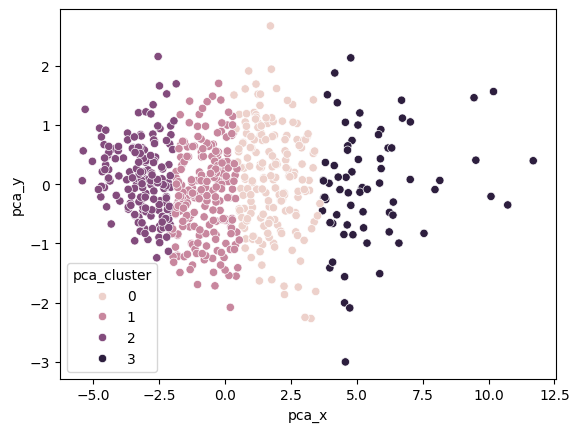

In [110]:
# 군집 결과 시각화
sns.scatterplot(df_pca, x='pca_x', y ='pca_y', hue='pca_cluster' )
plt.show()

In [112]:
# PCA를 전후 군집 결과 비교
df['pca_cluster'] = pca_cluster
df.head()


,HR,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,cluster,silhouette,player,pca_cluster
0,10,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804,0,0.352381,2000박종호,0
1,31,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000,2,0.589771,2000김동주,3
2,15,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820,0,0.501934,2000브리또,0
3,32,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594,2,0.610413,2000송지만,3
4,22,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284,0,0.522335,2000데이비스,0


In [114]:
df[['cluster', 'pca_cluster']].value_counts()

cluster  pca_cluster
1        1              171
3        2              149
0        0              124
2        3               61
1        0               47
0        1               28
3        1               27
1        2               23
0        3               10
2        0                9
Name: count, dtype: int64

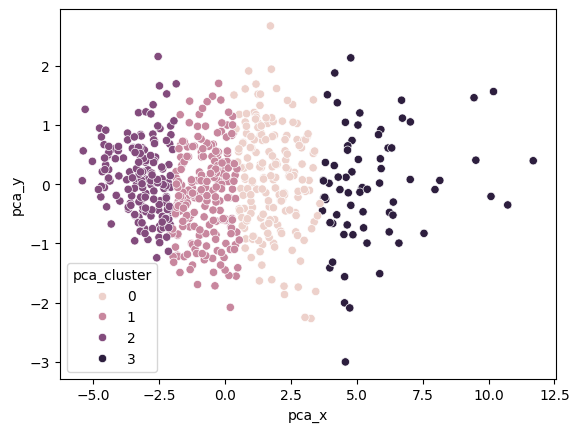

In [115]:
sns.scatterplot(df_pca, x='pca_x', y ='pca_y', hue='pca_cluster' )
plt.show()